#### 자료를 그래프나 숫자 등으로 요약하는 통계적 행위를 의미한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1.drop(['성별','학년'], inplace=True, axis=1)
df1

,국어,영어,수학,과학
이름,,,,
철수,98,NaN,88.0,64.0
영희,88,90.0,62.0,72.0
민수,92,70.0,NaN,NaN
수현,63,60.0,31.0,70.0
호영,120,50.0,NaN,88.0


### 요약 통계 정보: describe()
- count : 결측치를 제외한 데이터의 개수
- mean : 결측치를 제외한 평균
- min : 최소값
- std : 표준편차
- 25% : 25% 위치 값
- 50% : 50% 위치 값
- 75% : 75% 위치 값
- max : 최대값

In [3]:
df1.describe()

,국어,영어,수학,과학
count,5.000000,4.000000,3.000000,4.000000
mean,92.200000,67.500000,60.333333,73.500000
std,20.474374,17.078251,28.536526,10.246951
min,63.000000,50.000000,31.000000,64.000000
25%,88.000000,57.500000,46.500000,68.500000
50%,92.000000,65.000000,62.000000,71.000000
75%,98.000000,75.000000,75.000000,76.000000
max,120.000000,90.000000,88.000000,88.000000


In [4]:
# 특정 열에 대한 요약 통계 정보
df1['국어'].describe()

count      5.000000
mean      92.200000
std       20.474374
min       63.000000
25%       88.000000
50%       92.000000
75%       98.000000
max      120.000000
Name: 국어, dtype: float64

### 통계 함수
- count()
- mean()
- min()
- max()
- quantile()
- median()



In [6]:
df1

,국어,영어,수학,과학
이름,,,,
철수,98,NaN,88.0,64.0
영희,88,90.0,62.0,72.0
민수,92,70.0,NaN,NaN
수현,63,60.0,31.0,70.0
호영,120,50.0,NaN,88.0


In [5]:
# 결측치를 제외한 데이터의 개수
df1.count()

국어    5
영어    4
수학    3
과학    4
dtype: int64

In [7]:
# 결측치를 제외한 평균
df1.mean()

국어    92.200000
영어    67.500000
수학    60.333333
과학    73.500000
dtype: float64

In [9]:
# 결측치를 제외한 최대, 최소
display(df1.min())
display(df1.max())

국어    63.0
영어    50.0
수학    31.0
과학    64.0
dtype: float64

국어    120.0
영어     90.0
수학     88.0
과학     88.0
dtype: float64

In [10]:
# 표준편차와 분산
display(df1.std())
display(df1.var())

국어    20.474374
영어    17.078251
수학    28.536526
과학    10.246951
dtype: float64

국어    419.200000
영어    291.666667
수학    814.333333
과학    105.000000
dtype: float64

In [13]:
# 중간값(또는 그 위치의 값. default: 0.5)
df1.quantile()          # 50%

df1.quantile(q=0.25)    # 25%
df1.quantile(q=0.75)    # 75%

국어    88.0
영어    57.5
수학    46.5
과학    68.5
Name: 0.25, dtype: float64

In [14]:
# 중간값 (quantile(q=0.5)과 같음)
df1.median()

국어    92.0
영어    65.0
수학    62.0
과학    71.0
dtype: float64

### box plot
<img src='image/boxplot.png' height="900px" width="600px"/>
<br>
<br>


- 요약 통계 정보를 그래프로 표현한 것. 1 ~ 3분위 구간, 극단치 경계, 극단치 존재 여부를 파악하는 데 도움이 된다.
- 개념상의 극단치 : 사회 통념상 이상한 데이터들.
- 통계학적 이상치 : 극단치
- 극단치 : 상하위 0.3% 값이나 표준편차가 ±3 이상되는 것들.

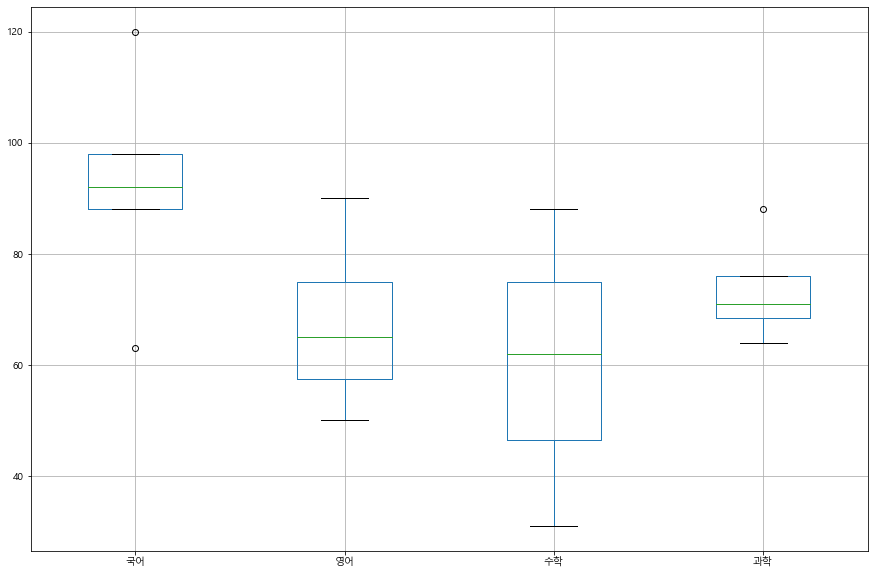

In [20]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
df1.boxplot(figsize=(15,10))
plt.show()

데이터 분석에 앞서 전처리가 완료된 데이터에 대해 결측치나 이상치를 처리

- 제거 : 결측치나 가진 데이터를 제거하는 것을 의미한다.
- 제거를 하게 되면 데이터가 왜곡되지만 학습량이 줄어든다.
- 대체 : 결측치나 이상치를 다른 값으로 바꾸는 것을 의미한다.
- 대체를 하게 되면 데이터가 왜곡되지만, 학습량은 유지된다.
- 제거를 추천. 제거 후 성능이 매우 안 좋다면 일단 집에 전화하고 대체할 값 을 찾아야한다.
- 대체를 선택했을 때는 누구나 납득할 수 있는 객관적인 지표를 찾아야하고 찾을 수가 없다면 평균이나 중간값을 추천한다.